In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
df=pd.read_csv('/content/twitter_validation.csv',encoding='ISO-8859-1',header=None)
df.columns=['id','social_media','target','text']
df


,id,social_media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
df.head()

,id,social_media,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
df.tail()

,id,social_media,target,text
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [6]:
df.isna().sum()

id              0
social_media    0
target          0
text            0
dtype: int64

In [7]:
df.dtypes

id               int64
social_media    object
target          object
text            object
dtype: object

In [8]:
a=df['social_media'].value_counts()
a

social_media
RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                      

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Facebook'),
  Text(1, 0, 'Amazon'),
  Text(2, 0, 'Microsoft'),
  Text(3, 0, 'CS-GO'),
  Text(4, 0, 'Google'),
  Text(5, 0, 'FIFA'),
  Text(6, 0, 'MaddenNFL'),
  Text(7, 0, 'TomClancysRainbowSix'),
  Text(8, 0, 'AssassinsCreed'),
  Text(9, 0, 'CallOfDuty'),
  Text(10, 0, 'Dota2'),
  Text(11, 0, 'Verizon'),
  Text(12, 0, 'NBA2K'),
  Text(13, 0, 'Nvidia'),
  Text(14, 0, 'GrandTheftAuto(GTA)'),
  Text(15, 0, 'RedDeadRedemption(RDR)'),
  Text(16, 0, 'Hearthstone'),
  Text(17, 0, 'ApexLegends'),
  Text(18, 0, 'Overwatch'),
  Text(19, 0, 'PlayerUnknownsBattlegrounds(PUBG)'),
  Text(20, 0, 'Borderlands'),
  Text(21, 0, 'PlayStation5(PS5)'),
  Text(22, 0, 'johnson&johnson'),
  Text(23, 0, 'Fortnite'),
  Text(24, 0, 'Xbox(Xseries)'),
  Text(25, 0, 'CallOfDutyBlackopsColdWar'),
  Text(26, 0, 'HomeDepot'

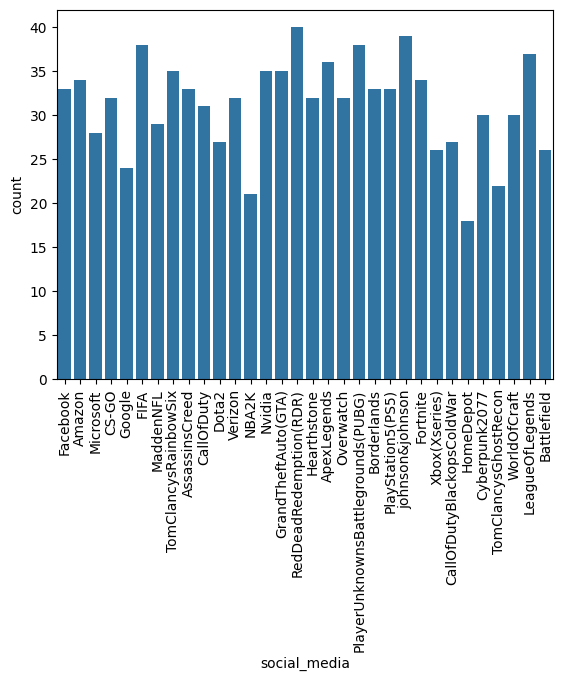

In [9]:
sns.countplot(x=df['social_media'],data=df)
plt.xticks(rotation=90)

In [10]:
b=df['target'].value_counts()
b

target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

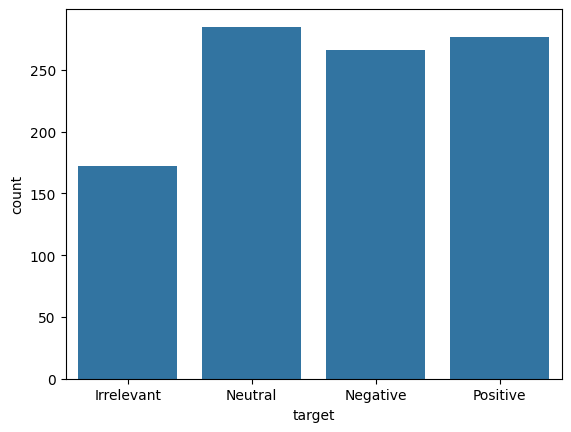

In [11]:
sns.countplot(x=df['target'],data=df)

In [12]:
df.drop(df.index[df['target']=='Irrelevant'],axis=0,inplace=True)
df

,id,social_media,target,text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:
#index correct

# ignore_index
df.reset_index(drop=True,inplace=True)
df

,id,social_media,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [14]:
df.drop(['id','social_media'],axis=1,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
df['target']=df['target'].map({'Positive':1,'Neutral':0,'Negative':-1})
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [16]:
tweets=df.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [17]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))         # apply keyword must be used for while using lambda     x-variable   tk.tokenize(x) -function to apply
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [18]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')      # + --> #### $$$$$$$  if combination comes need to replace so + defined
tweets


0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [19]:
# # a word should be meaningfull if the word has min 3 letters
# so removing words length less than three letters
from nltk.tokenize import word_tokenize
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x ) if len(w)>=3 ]))
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1      Microsoft Why pay for WORD when functions poor...
2      CSGO matchmaking full closet hacking truly awf...
3      Now the President slapping Americans the face ...
4      EAHelp had Madeleine McCann cellar for the pas...
                             ...                        
823    Please explain how this possible How can they ...
824    Good Sony much want see the new PS5 what going...
825    Today sucked itâ time drink wine play borderla...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [20]:
# stemming
from nltk.stem import SnowballStemmer
st=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[st.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets


0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay for word when function poor ...
2           csgo matchmak full closet hack truli aw game
3      now the presid slap american the face that rea...
4      eahelp had madelein mccann cellar for the past...
                             ...                        
823    pleas explain how this possibl how can they le...
824    good soni much want see the new ps5 what go ri...
825    today suck itâ time drink wine play borderland...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder and...
Name: text, Length: 828, dtype: object

In [21]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl let compani overcharg it...
824    good soni much want see new ps5 go right much ...
825    today suck itâ time drink wine play borderland...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<828x3926 sparse matrix of type '<class 'numpy.float64'>'
	with 10813 stored elements in Compressed Sparse Row format>

In [23]:
print(data)

  (0, 651)	0.2427327101497663
  (0, 427)	0.2427327101497663
  (0, 3589)	0.218789669529763
  (0, 797)	0.11662982606902167
  (0, 979)	0.2427327101497663
  (0, 1113)	0.22872692923382096
  (0, 2026)	0.12356149476428094
  (0, 238)	0.2110817320771546
  (0, 826)	0.16496744976456024
  (0, 770)	0.19945913783617822
  (0, 2843)	0.2427327101497663
  (0, 522)	0.2427327101497663
  (0, 1855)	0.22872692923382096
  (0, 589)	0.218789669529763
  (0, 307)	0.1419455972285028
  (0, 2331)	0.3676928780052261
  (0, 490)	0.4574538584676419
  (1, 760)	0.4052090854499021
  (1, 2975)	0.4052090854499021
  (1, 2628)	0.3818283483730563
  (1, 1401)	0.4052090854499021
  (1, 3814)	0.36523945141691455
  (1, 2525)	0.31240246924634235
  (1, 3771)	0.26191944627409375
  (1, 2189)	0.24905209813650908
  :	:
  (825, 586)	0.2251053994296016
  (825, 971)	0.2251053994296016
  (825, 3489)	0.21143109955979203
  (825, 1838)	0.23256374689752723
  (825, 3330)	0.2823645460073434
  (825, 2593)	0.16727034067939098
  (826, 1375)	0.50725027

In [24]:
data.shape

(828, 3926)

In [25]:
y=df['target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [26]:
# input
x=data
x

<828x3926 sparse matrix of type '<class 'numpy.float64'>'
	with 10813 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

<579x3926 sparse matrix of type '<class 'numpy.float64'>'
	with 7478 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
knn=KNeighborsClassifier(n_neighbors=7)
base=MultinomialNB()
model=SVC()
lst=[knn,base,model]



In [29]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('model is:',i)
  print(y_pred)
  print('confusion matrix:',confusion_matrix(y_test,y_pred))
  print('accuracy_score:',accuracy_score(y_test,y_pred))
  print('*'*100)

model is: KNeighborsClassifier(n_neighbors=7)
[-1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  0 -1 -1 -1  0  0  1
 -1  1  1 -1  0  1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1  0  1  1 -1  1  0
 -1 -1  1 -1 -1 -1 -1  0  1 -1  1  0  1 -1  0  0 -1  0 -1  0 -1 -1  1  0
 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  0 -1 -1  1  1 -1 -1  1 -1 -1  0  0
 -1  0 -1 -1 -1 -1  0 -1 -1  1  1 -1 -1 -1  0 -1  1 -1  1 -1 -1 -1 -1 -1
 -1  1 -1  1  0  1 -1 -1  0 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  0 -1  0  0
  0  1  0  0  1  1 -1 -1  1 -1 -1  0  1  0 -1  0 -1  0 -1 -1  1  0  0 -1
  0  0 -1  1  0  0 -1 -1 -1  1 -1 -1  1 -1  0  0 -1  1 -1 -1 -1  1  0  0
 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  0  1 -1 -1  0  0  1  1 -1
 -1 -1 -1  0 -1  1 -1 -1 -1 -1 -1 -1  0  0 -1  0 -1 -1  1  0 -1  1 -1  0
  0 -1  1 -1 -1 -1 -1  0 -1]
confusion matrix: [[57 10 12]
 [37 30 12]
 [46 12 33]]
accuracy_score: 0.4819277108433735
****************************************************************************************************
mode